<a href="https://colab.research.google.com/github/gabycabrera09/Coderhouse/blob/main/Precio_Inmuebles_Cabrera_Gabriel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis en python sobre el precio de inmuebles en Washington


# Indice



1.   Abstract
2.   Presentación del Dataset y Análisis Exploratorio
3.   Hipótesis 1 - Piletas
4.   Hipótesis 2 - Zonas
5.   Hipótesis 3 - Año de Construcción
6.   Conclusión final de hipótesis
7.  Data Wrangling
8.   Feature Selection
9.   Evaluando Algoritmos
10. Mejora del Modelo

#1. Abstract

##**1-Datos Generales**

En el contexto de Washington, Estados Unidos, el negocio de bienes raíces ha experimentado un crecimiento significativo en las últimas décadas. La región se ha convertido en un destino atractivo tanto para residentes locales como para inversores internacionales debido a su próspera economía, oportunidades laborales y calidad de vida. El mercado inmobiliario en Washington ofrece una amplia gama de propiedades, desde apartamentos urbanos hasta lujosas casas suburbanas y fincas rurales.

##Considerando el crecimiento del mercado inmobiliario en Washington, existen diversas oportunidades de negocio que motivan a ser exploradas:

**A)Agencia inmobiliaria especializada en propiedades de lujo**: Con el aumento de la demanda de casas de alto nivel en Washington, podría ser rentable establecer una agencia inmobiliaria enfocada exclusivamente en la venta y alquiler de propiedades de lujo.

**B)Servicios de consultoría para inversionistas internacionales**: Washington atrae a inversores de todo el mundo interesados en adquirir propiedades en una de las regiones más prósperas de Estados Unidos. Ofrecer servicios de asesoramiento y consultoría a inversionistas extranjeros podría ser una oportunidad lucrativa.

**C)Desarrollo de propiedades sostenibles**: Existe un creciente interés en las propiedades ecológicas y sostenibles. Crear un negocio centrado en el desarrollo y venta de casas sostenibles, con características amigables con el medio ambiente, podría ser una opción innovadora.

**D)Servicios de remodelación y diseño de interiores**: Muchos propietarios desean personalizar y mejorar sus propiedades existentes. Ofrecer servicios de remodelación y diseño de interiores podría ser una forma rentable de capitalizar la demanda en el mercado.

#**2.Dataset**

El dataset a trabajar está en formato CSV, y contiene datos sobre ventas de casas en el estado de Washington, Estados Unidos entre el 2014 y 2015. El mismo fue obtenido de https://www.kaggle.com/

#**3.Definición de temática**
Como dato más importante en el dataset tenemos el precio de la casa y a su vez tenemos otros datos que describen las casas. A partir de esos datos que describen a las casas intentaremos hacer el análisis para determinar que variables influyen en el precio y poder asesorar en las oportunidades de negocio ya descriptas.

##3.1-Hipótesis
Se plantearán tres hipótesis:

La primera hipótesis tiene como objetivo determinar si la presencia de una pileta en una casa influye en su precio y en qué medida.

La segunda hipótesis es encontrar indicadores que permitan predecir el precio en función del código postal de la zona.

Por último, se investigará si el año de construcción de una casa tiene un impacto en su precio de venta.

Se espera que los resultados obtenidos a través de este estudio permitan mejorar la precisión de las predicciones de precios de casas y proporcionen información valiosa para los actores del mercado inmobiliario en Estados Unidos.

##3.2- Usuarios finales:
El análisis de este dataset sería relevante para emprendedores y profesionales del sector inmobiliario interesados en aprovechar el crecimiento constante del mercado inmobiliario en la región.

Podrían surgir oportunidades de negocio, como agencias especializadas en propiedades de lujo, servicios de consultoría para inversores internacionales, desarrollo de propiedades sostenibles y servicios de remodelación y diseño de interiores.


#2. Presentación del Dataset y Análisis Exploratorio

Importamos librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import os
import warnings
import requests


In [2]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

import xgboost as xgb
from sklearn.model_selection import cross_val_score, cross_val_predict


Importamos el Dataset y vemos los campos que contiene.

In [3]:
url='https://raw.githubusercontent.com/gabycabrera09/CoderHouse/main/casas%20EEUU.csv'
df_casas = pd.read_csv(url, delimiter=';', encoding='ISO-8859-1')
pd.set_option('display.max_columns', None)

df_casas


,id,año,mes,dia,habitaciones,baños,metros_cuadrados_techados,metros_cuadrados_totales,pisos,pileta,view,condicion,grado,metros_cuadrados_arriba,metros_cuiadrados_sotano,año_construccion,fue_renovado,codigo_postal,sqft_living15,sqft_lot15,price
0,7129300520,2014,10,13,3,1,1180,5650,1,0,0,3,7,1180,0,1955,no,98178,1340,5650,221900
1,6414100192,2014,12,9,3,"2,25",2570,7242,2,0,0,3,7,2170,400,1951,si,98125,1690,7639,538000
2,5631500400,2015,2,25,2,1,770,10000,1,0,0,3,6,770,0,1933,no,98028,2720,8062,180000
3,2487200875,2014,12,9,4,3,1960,5000,1,0,0,5,7,1050,910,1965,no,98136,1360,5000,604000
4,1954400510,2015,2,18,3,2,1680,8080,1,0,0,3,8,1680,0,1987,no,98074,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20116,263000018,2014,5,21,3,"2,5",1530,1131,3,0,0,3,8,1530,0,2009,no,98103,1530,1509,360000
20117,6600060120,2015,2,23,4,"2,5",2310,5813,2,0,0,3,8,2310,0,2014,no,98146,1830,7200,400000
20118,1523300141,2014,6,23,2,"0,75",1020,1350,2,0,0,3,7,1020,0,2009,no,98144,1020,2007,402101
20119,291310100,2015,1,16,3,"2,5",1600,2388,2,0,0,3,8,1600,0,2004,no,98027,1410,1287,400000


En primera instancia vamos ver los tipo de objeto de las columnas y si contienen valores faltantes o nulos (nulls).

In [4]:
df_casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20121 entries, 0 to 20120
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   id                         20121 non-null  int64 
 1   año                        20121 non-null  int64 
 2   mes                        20121 non-null  int64 
 3   dia                        20121 non-null  int64 
 4   habitaciones               20121 non-null  int64 
 5   baños                      20121 non-null  object
 6   metros_cuadrados_techados  20121 non-null  int64 
 7   metros_cuadrados_totales   20121 non-null  int64 
 8   pisos                      20121 non-null  object
 9   pileta                     20121 non-null  int64 
 10  view                       20121 non-null  int64 
 11  condicion                  20121 non-null  int64 
 12  grado                      20121 non-null  int64 
 13  metros_cuadrados_arriba    20121 non-null  int64 
 14  metros

In [5]:
df_casas.isnull().sum()

id                           0
año                          0
mes                          0
dia                          0
habitaciones                 0
baños                        0
metros_cuadrados_techados    0
metros_cuadrados_totales     0
pisos                        0
pileta                       0
view                         0
condicion                    0
grado                        0
metros_cuadrados_arriba      0
metros_cuiadrados_sotano     0
año_construccion             0
fue_renovado                 0
codigo_postal                0
sqft_living15                0
sqft_lot15                   0
price                        0
dtype: int64

Al no contener nulls y luego de ver los tipo de datos seguimos con el análisis.

Con el siguiente Tree Map, podemos poner foco en la variable de interés que es precio y su correlación con el resto de las variables.

Vemos que los metros cuadrados techados, el grado, y habitaciones son de las variables que más correlación tiene con el precio. Esto es bueno de saber al momento de empezar a análisar las hipótesis.

<ipython-input-6-03d359f93527>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr= df_sin_columnas.corr()


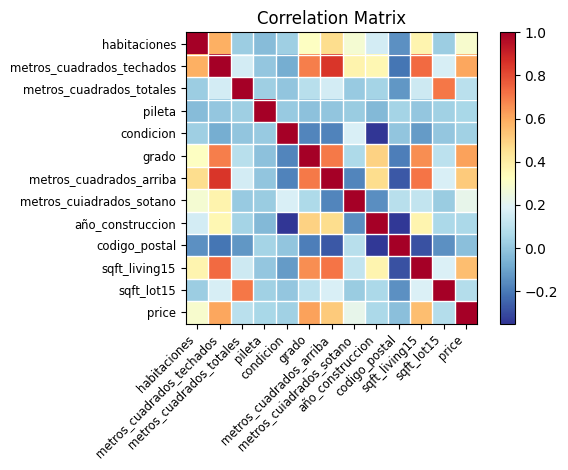

In [6]:
columnas_a_eliminar = ['id', 'año', 'dia', 'mes','view' ]
df_sin_columnas = df_casas.drop(columnas_a_eliminar, axis=1)

corr= df_sin_columnas.corr()
sm.graphics.plot_corr(corr,xnames=(list(corr.columns)))
plt.show()

#3. Hipótesis 1 - Piletas

En primera instancia con un grafico de boxplot vemos que las casas con pileta  tienen una mediana mayor que las casas sin pileta

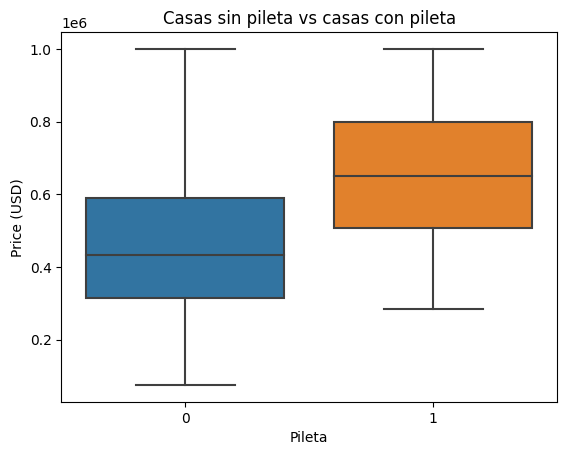

In [7]:
# Crea un gráfico de caja utilizando Seaborn para comparar el precio entre casas sin pileta y casas con pileta
sns.boxplot(data=df_casas, x="pileta", y="price")
# Establece el título del gráfico
plt.title("Casas sin pileta vs casas con pileta");
# Obtiene los objetos de los ejes
ax = plt.gca()
# Cambia el nombre del eje x
ax.set_xlabel('Pileta')
# Cambia el nombre del eje y
ax.set_ylabel('Price (USD)')
# Muestra el gráfico
plt.show()

Por otro lado en el dataset vemos que se les asigna un valor de condicion a las casas. Y podemos ver que las casas con pileta ya están en un rango mayor a 3. Pero solo la mediana es mayor para las casas en condición 3 y 4, por lo que podemos pensar que tal vez para ser una casa de rango 5 hay que tener en cuenta otros factores además de una pileta.

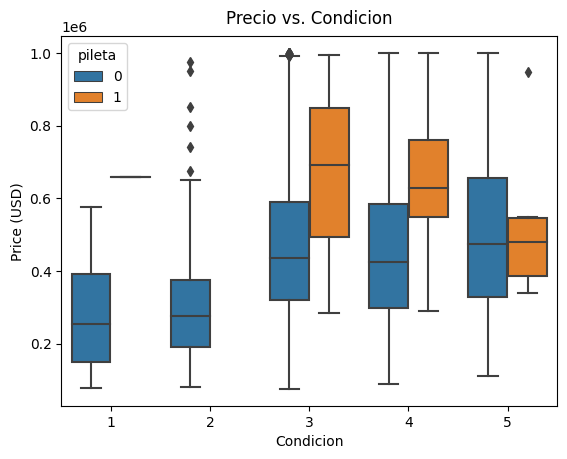

In [8]:
# Crea un gráfico de caja utilizando Seaborn para comparar el precio en función de la condición de las casas,
# agrupando también por la presencia o ausencia de pileta
sns.boxplot(x='condicion', y='price', hue='pileta', data=df_casas)
# Establece el título del gráfico con tamaño de fuente y alineación vertical personalizados
plt.title("Precio vs. Condicion", fontsize=12, verticalalignment='bottom')
# Obtiene los objetos de los ejes
ax = plt.gca()
# Cambia el nombre del eje x
ax.set_xlabel('Condicion')
# Cambia el nombre del eje y
ax.set_ylabel('Price (USD)')
# Muestra el gráfico
plt.show()

A su vez si siguemos con el análisis. En este scatterplot vemos que a medida que la casa tiene más metros cuadrados techados el precio aumenta.

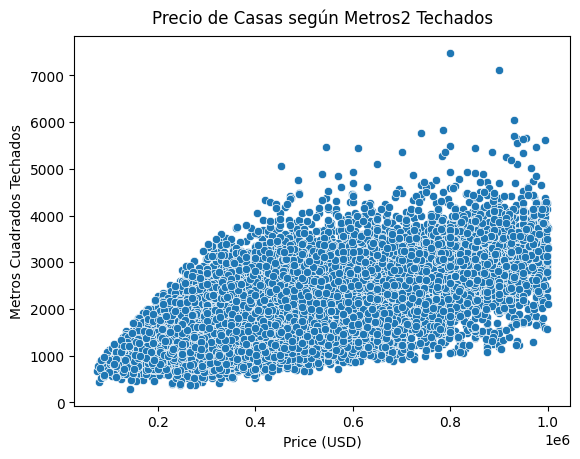

In [9]:
# Crea un gráfico de dispersión utilizando Seaborn para mostrar el precio de las casas en función de los metros cuadrados techados
sns.scatterplot(data=df_casas, x="price", y="metros_cuadrados_techados")
# Establece el título del gráfico con tamaño de fuente y alineación vertical personalizados
plt.title("Precio de Casas según Metros2 Techados", fontsize=12, verticalalignment='bottom')
# Obtiene los objetos de los ejes
ax = plt.gca()
# Cambia el nombre del eje x
ax.set_xlabel('Price (USD)')
# Cambia el nombre del eje y
ax.set_ylabel('Metros Cuadrados Techados')
# Muestra el gráfico
plt.show()


En el siguiente grafico vemos como las casas con hasta 6 ambientes del dataset tienen pileta y aumenta significativamente el precio en los casos que tienen pileta vs los que no tienen pileta.

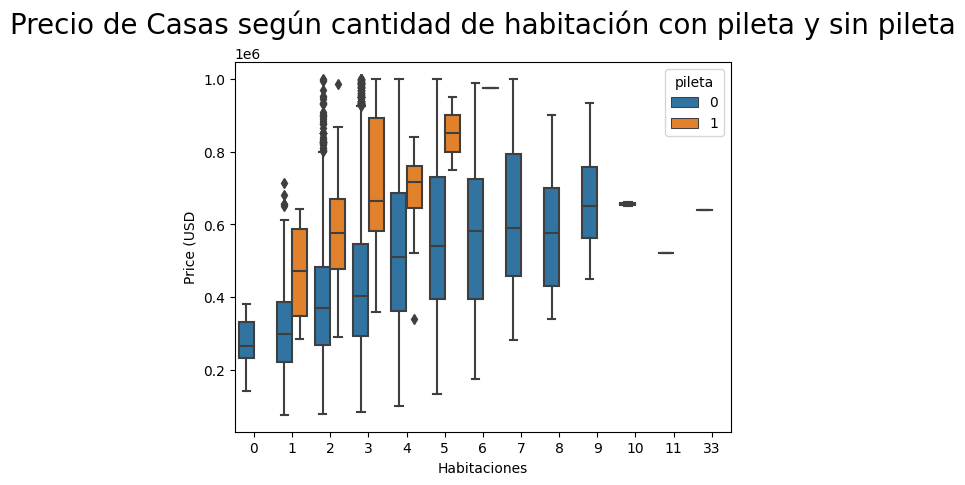

In [10]:
# Crea un gráfico de caja utilizando Seaborn para comparar el precio entre casas sin pileta y casas con pileta según la cantidad de habitaciones
sns.boxplot(x='habitaciones', y = 'price', hue = 'pileta', data = df_casas)
# Establece el título del gráfico con tamaño de fuente y alineación vertical personalizados
plt.title("Precio de Casas según cantidad de habitación con pileta y sin pileta", fontsize=20, verticalalignment='bottom');
# Obtiene los objetos de los ejes
ax = plt.gca()
# Cambia el nombre del eje x
ax.set_xlabel('Habitaciones')
# Cambia el nombre del eje y
ax.set_ylabel('Price (USD')
plt.show();

##Conclusiones Hipótesis  1

---


Los precios de las casas tienden a aumentar en general, pero cuando se trata de casas con más de 5 o 6 habitaciones, el valor no aumenta proporcionalmente en comparación con las casas de tamaño más pequeño. Sin embargo, cuando se añade una pileta a la propiedad, se puede observar un aumento significativo del valor de la casa, incluso si tiene muchas habitaciones.

También hay otros factores que influyen cómo son los metros cuadrados techados y la condición en que se encuentra. En el caso de la condición vimos que en la condición de grado 5 (la mayor) no hace la diferencia tener la pileta.

En resumen, recomendaría la presencia de una pileta en una casa solo si son de tamaño pequeño o mediano puede aumentar significativamente su valor en el mercado inmobiliario. En una casa grande, seguramente son otras variables las que hacen atractiva a la casa.



#4. Hipótesis 2 - Zonas

In [11]:
#Ordenamos el dataset según los códigos postales
df_casas = df_casas.sort_values('codigo_postal', ascending=False)
#Obtenemos cada uno de los códigos postales existentes en el dataset
codigos_postales_unicos = df_casas['codigo_postal'].unique()
# imprimir la lista de códigos postales únicos
print(codigos_postales_unicos)

[98199 98198 98188 98178 98177 98168 98166 98155 98148 98146 98144 98136
 98133 98126 98125 98122 98119 98118 98117 98116 98115 98112 98109 98108
 98107 98106 98105 98103 98102 98092 98077 98075 98074 98072 98070 98065
 98059 98058 98056 98055 98053 98052 98045 98042 98040 98039 98038 98034
 98033 98032 98031 98030 98029 98028 98027 98024 98023 98022 98019 98014
 98011 98010 98008 98007 98006 98005 98004 98003 98002 98001]


Al imprimir todos los códigos postales posibles del dataset podemos obtener a qué ciudad corresponde cada código y asi asociarlo con cada casa para poder hacer un mejor análisis. A continuación hacemos un diccionario con las ciudades de cada código y creamos la columna Ubicación para poder hacer un análisis a partir de ahí.

In [12]:
mapa_codigos = {
    98199: 'Seattle',
    98198: 'Des Moines',
    98188: 'Tukwila',
    98178: 'Seattle',
    98177: 'Seattle',
    98168: 'Seattle',
    98166: 'Burien',
    98155: 'Shoreline',
    98148: 'Seattle',
    98146: 'Seattle',
    98144: 'Seattle',
    98136: 'Seattle',
    98133: 'Seattle',
    98126: 'Seattle',
    98125: 'Seattle',
    98122: 'Seattle',
    98119: 'Seattle',
    98118: 'Seattle',
    98117: 'Seattle',
    98116: 'Seattle',
    98115: 'Seattle',
    98112: 'Seattle',
    98109: 'Seattle',
    98108: 'Seattle',
    98107: 'Seattle',
    98106: 'Seattle',
    98105: 'Seattle',
    98103: 'Seattle',
    98102: 'Seattle',
    98092: 'Auburn',
    98077: 'Woodinville',
    98075: 'Sammamish',
    98074: 'Sammamish',
    98072: 'Woodinville',
    98070: 'Vashon',
    98065: 'Snoqualmie',
    98059: 'Renton',
    98058: 'Renton',
    98056: 'Renton',
    98055: 'Renton',
    98053: 'Redmond',
    98052: 'Redmond',
    98045: 'North Bend',
    98042: 'Kent',
    98040: 'Mercer Island',
    98039: 'Medina',
    98038: 'Maple Valley',
    98034: 'Kirkland',
    98033: 'Kirkland',
    98032: 'Kent',
    98031: 'Kent',
    98030: 'Kent',
    98029: 'Issaquah',
    98028: 'Kenmore',
    98027: 'Issaquah',
    98024: 'Fall City',
    98023: 'Federal Way',
    98022: 'Enumclaw',
    98019: 'Duvall',
    98014: 'Carnation',
    98011: 'Bothell',
    98010: 'Black Diamond',
    98008: 'Bellevue',
    98007: 'Bellevue',
    98006: 'Bellevue',
    98005: 'Bellevue',
    98004: 'Bellevue',
    98003: 'Federal Way',
    98002: 'Auburn',
    98001: 'Auburn'
}

df_casas['Ubicación'] = df_casas['codigo_postal'].replace(mapa_codigos)


In [13]:
# imprimir la lista de códigos postales únicos
ciudades = df_casas['Ubicación'].unique()
ciudades

array(['Seattle', 'Des Moines', 'Tukwila', 'Burien', 'Shoreline',
       'Auburn', 'Woodinville', 'Sammamish', 'Vashon', 'Snoqualmie',
       'Renton', 'Redmond', 'North Bend', 'Kent', 'Mercer Island',
       'Medina', 'Maple Valley', 'Kirkland', 'Issaquah', 'Kenmore',
       'Fall City', 'Federal Way', 'Enumclaw', 'Duvall', 'Carnation',
       'Bothell', 'Black Diamond', 'Bellevue'], dtype=object)

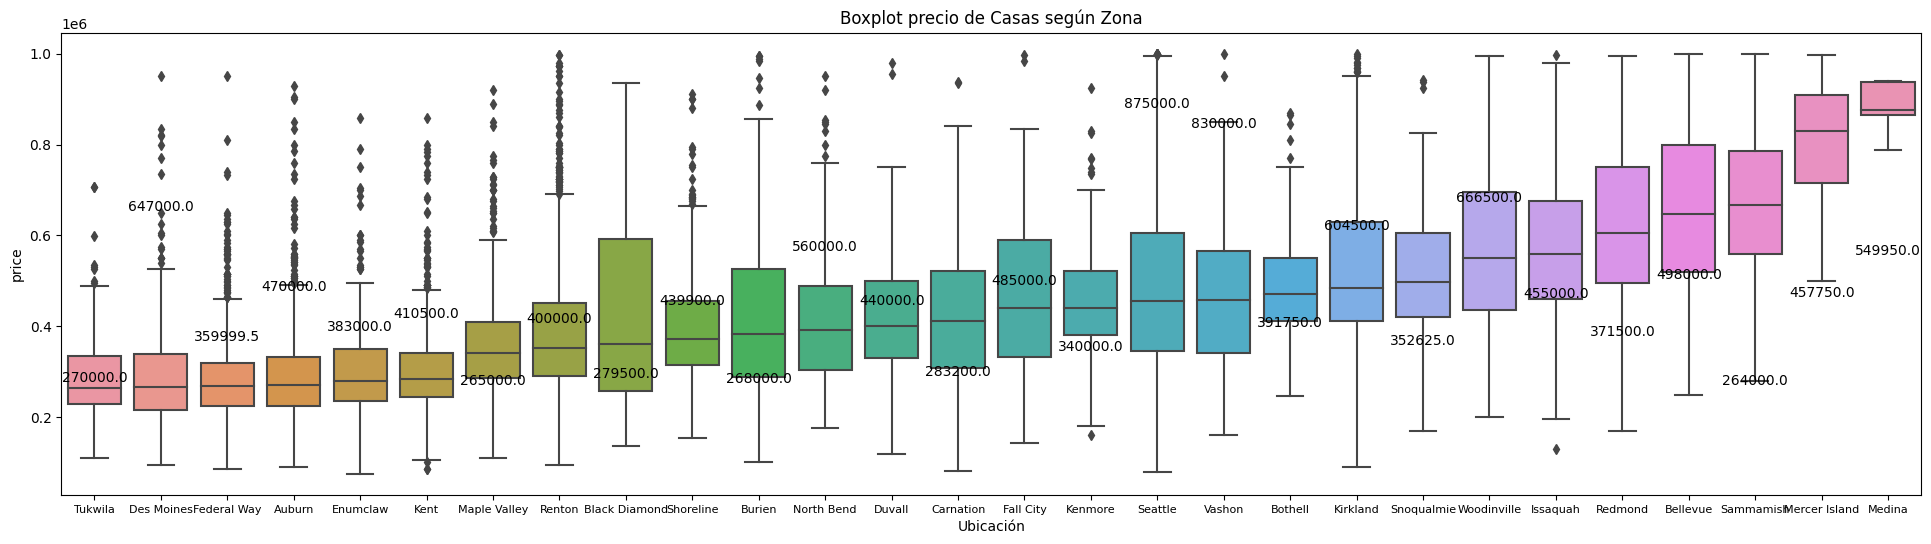

In [14]:
# Obtener el orden de las ubicaciones según la mediana de precios
orden_ubicaciones = df_casas.groupby('Ubicación')['price'].median().sort_values().index

# Establecer el tamaño de la figura
plt.figure(figsize=(24, 6))

# Crear el gráfico de caja (boxplot) con las ubicaciones ordenadas
sns.boxplot(data=df_casas, x="Ubicación", y="price", order=orden_ubicaciones)
plt.title("Boxplot precio de Casas según Zona")

# Agregar el valor de la mediana como número en el gráfico
medians = df_casas.groupby(['Ubicación'])['price'].median().values
pos = range(len(medians))
for i in pos:
    plt.text(pos[i], medians[i], str(medians[i]), ha='center', va='bottom')

# Ajustar el tamaño de la letra de los conceptos del eje x
plt.xticks(fontsize=8)

# Mostrar el gráfico
plt.show()

##Conclusiones Hipótesis  2

---


Al categorizar los códigos postales para cada zona que le corresponde podemos ver como hay 2 zonas con los precios con la mediana más alta y destacada del resto que son Island y Medina con lo que podríamos decir que son las zonas más caras y exclusivas del estado.

Luego podemos ver que Tukwila, Des Moines, Federal, Auburn y Enumclaw son las zonas con los precio más bajos del estado de Washington.

Sin embargo a excepeción de Tuwkila, todas las ciudades tienen outliers que llegan a estar al precio de las ciudades más caras. Por lo que podemos decir que en mayor o menor medida, existen casas con precios muy altos en casi todas las ciudades.

#5. Hipótesis 3 - Año de Construcción

Primero vemos todos los años de construcción de las casas que tenemos datos. Hacemos un proceso similar a la hipótesis anterior y agrupamos los años en décadas para hacer un mejor análisis.

In [15]:
#Ordenamos el dataset según el año de construcción
df_casas = df_casas.sort_values('año_construccion', ascending=False)
#Obtenemos todos los años de construcción posibles del dataset
año_construccion = df_casas['año_construccion'].unique()
# imprimir la lista de códigos postales únicos
print(año_construccion)

[2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002
 2001 2000 1999 1998 1997 1996 1995 1994 1993 1992 1991 1990 1989 1988
 1987 1986 1985 1984 1983 1982 1981 1980 1979 1978 1977 1976 1975 1974
 1973 1972 1971 1970 1969 1968 1967 1966 1965 1964 1963 1962 1961 1960
 1959 1958 1957 1956 1955 1954 1953 1952 1951 1950 1949 1948 1947 1946
 1945 1944 1943 1942 1941 1940 1939 1938 1937 1936 1935 1934 1933 1932
 1931 1930 1929 1928 1927 1926 1925 1924 1923 1922 1921 1920 1919 1918
 1917 1916 1915 1914 1913 1912 1911 1910 1909 1908 1907 1906 1905 1904
 1903 1902 1901 1900]


In [16]:
#Agrupar los años en decadas
año_construccion = []

for score in df_casas['año_construccion']:
    if score < 1911 : año_construccion.append('1900-1910')
    elif score < 1921 : año_construccion.append('1911-1920')
    elif score < 1931 : año_construccion.append('1921-1930')
    elif score < 1941 : año_construccion.append('1931-1940')
    elif score < 1951 : año_construccion.append('1941-1950')
    elif score < 1961 : año_construccion.append('1951-1960')
    elif score < 1971 : año_construccion.append('1961-1970')
    elif score < 1981 : año_construccion.append('1971-1980')
    elif score < 1991 : año_construccion.append('1981-1990')
    elif score < 2001 : año_construccion.append('1991-2000')
    elif score < 2011 : año_construccion.append('2001-2010')
    elif score < 2016 : año_construccion.append('2011-2015')



    #Crear la nueva columna y cambiar el tipo de categoría

df_casas['año_construccion'] = año_construccion

df_casas['año_construccion'] = df_casas['año_construccion'].astype('category')

df_casas

,id,año,mes,dia,habitaciones,baños,metros_cuadrados_techados,metros_cuadrados_totales,pisos,pileta,view,condicion,grado,metros_cuadrados_arriba,metros_cuiadrados_sotano,año_construccion,fue_renovado,codigo_postal,sqft_living15,sqft_lot15,price,Ubicación
13952,2770602360,2015,4,21,4,"2,75",1890,1475,2,0,0,3,9,1200,690,2011-2015,no,98199,1650,1682,671000,Seattle
19427,1257201420,2014,7,9,4,"3,25",3730,4560,2,0,0,3,9,2760,970,2011-2015,no,98103,1800,4560,595000,Seattle
19289,255470030,2015,4,29,4,"2,75",2630,4501,2,0,0,3,8,2630,0,2011-2015,no,98028,2380,4599,619990,Kenmore
13547,2770601530,2014,8,26,2,"2,25",1570,1269,2,0,0,3,9,1280,290,2011-2015,no,98199,1570,6000,500000,Seattle
15958,9126100346,2014,6,17,3,2,1380,3600,3,0,0,3,8,1380,0,2011-2015,no,98122,1480,3600,350000,Seattle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9840,5318100935,2014,10,20,3,2,1540,3600,2,0,0,3,8,1540,0,1900-1910,si,98112,2970,3600,850000,Seattle
10416,7942602080,2014,6,16,6,"1,75",1840,2774,1,0,0,3,7,1060,780,1900-1910,no,98122,1680,4292,660000,Seattle
1808,2767603215,2014,5,16,3,2,1450,2400,"1,5",0,0,3,8,1450,0,1900-1910,si,98107,1450,4275,490000,Seattle
14036,1703400585,2014,12,15,3,2,2330,4950,"1,5",0,0,3,6,1430,900,1900-1910,no,98118,1160,5115,325000,Seattle


Con un boxplot vemos que los años desde 1900 a 1930, es decir, las casas más antiguas del dataset son las que tienen un precio con una mediana más alta junto con las casas de la última década.

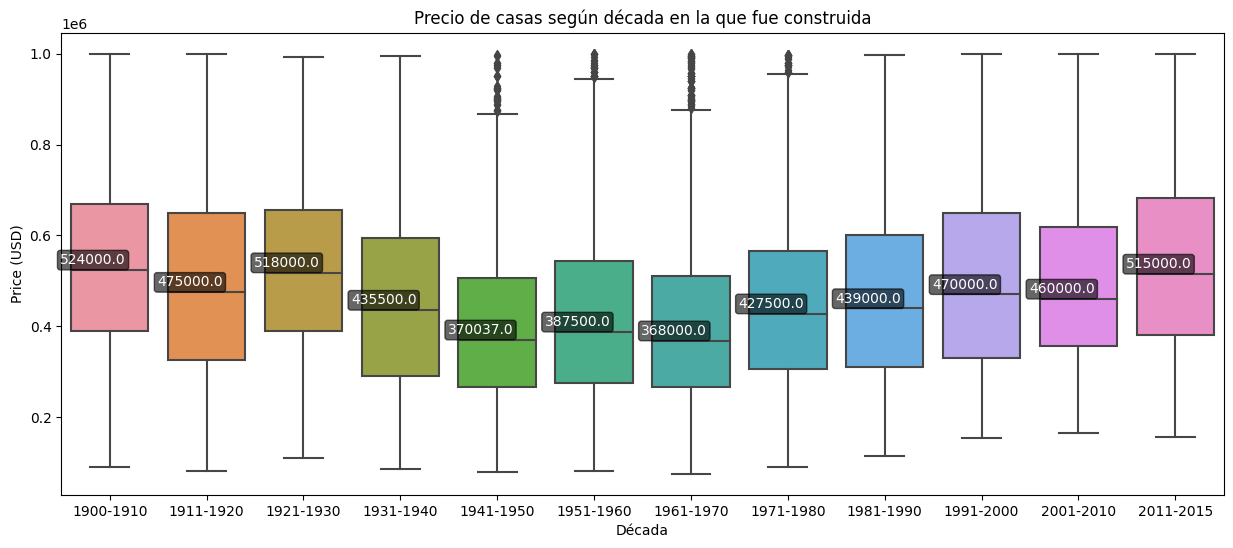

In [17]:
# Establece el tamaño de la figura del gráfico
plt.figure(figsize=(15, 6))
# Crea un gráfico de caja utilizando Seaborn para mostrar el precio de las casas según la década en la que fueron construidas
sns.boxplot(data=df_casas, x="año_construccion", y="price")
# Establece el título del gráfico
plt.title("Precio de casas según década en la que fue construida")
# Obtiene los objetos de los ejes
ax = plt.gca()
# Cambia el nombre del eje x
ax.set_xlabel('Década')
# Cambia el nombre del eje y
ax.set_ylabel('Price (USD)')


# Agregamos el valor de la mediana con annotate
medians = df_casas.groupby(['año_construccion'])['price'].median().values
n_obs = df_casas['año_construccion'].value_counts().values
pos = range(len(n_obs))
for i in pos:
    plt.annotate(str(medians[i]), xy=(pos[i], medians[i]),
                 xytext=(-12, 7), textcoords='offset points',
                 ha='center', va='center', color='white',
                 bbox=dict(boxstyle='round,pad=0.2',
                           fc='black', alpha=0.6))

Al análisis anterior agregamos la variable si fue renovada para ver si podemos obtener alguna nueva conclusión.

En principio la mediana de los precios aumenta para todos los casos, algo que es lógico. En ciertos casos los aumentos no son singificativos como es el caso de las casas construidas entre los años 1900 y 1930.

Pero por otro lado vemos que en las casas ubicadas en la década del 40, 50 y 60 los outliers de precios altos en el caso de que la casa no haya sido renovada desaparecen y pasan a ser parte del "bigote" del gráfico.

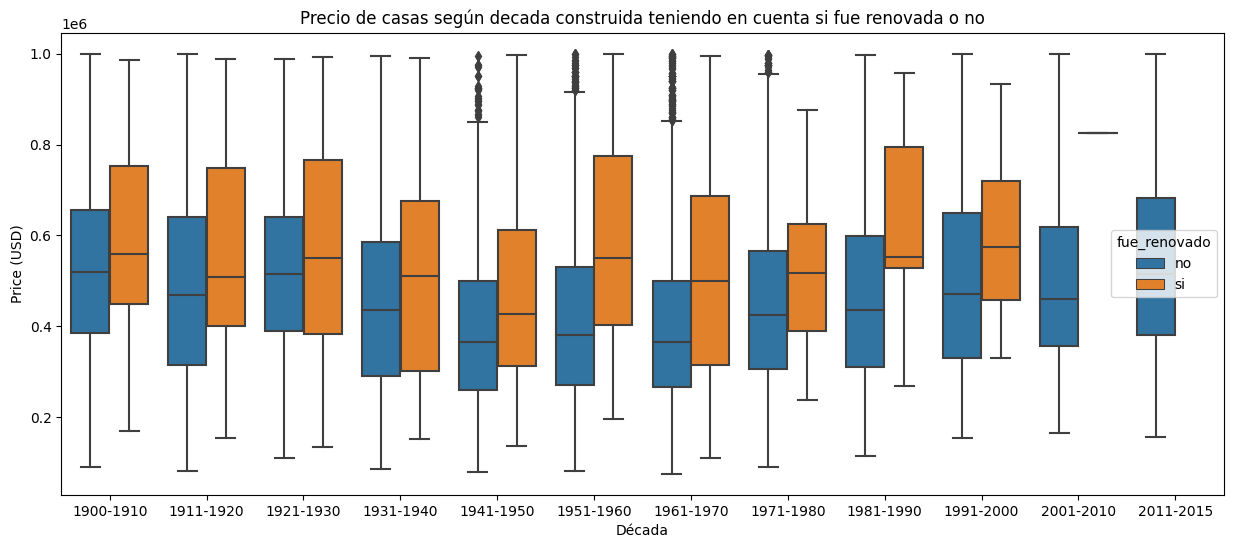

In [18]:
# Establece el tamaño de la figura del gráfico
plt.figure(figsize=(15, 6))
# Crea un gráfico de caja utilizando Seaborn para mostrar el precio de las casas según la década en la que fueron construidas teniendo en cuenta si fue renovada o no
sns.boxplot(data=df_casas, x="año_construccion", y="price",hue='fue_renovado')
# Establece el título del gráfico
plt.title("Precio de casas según decada construida teniendo en cuenta si fue renovada o no");
# Obtiene los objetos de los ejes
ax = plt.gca()
# Cambia el nombre del eje x
ax.set_xlabel('Década')
# Cambia el nombre del eje y
ax.set_ylabel('Price (USD)')
# Muestra el gráfico
plt.show()

Para cerrar este análisis del año de construcción de las casas, comparamos con otra variable que no sea precio. Y vemos la mediana de los metros cuadrados de las casas según la década.

Se puede observar que a partir de la década del 70 inclusive las casas son cada vez más grandes.

En la última década casi que multiplican el tamaño de metros cuadrados techados con respecto a las casas de la década del 40. Por lo que puede ser una variable más que explica por qué las casas de la última década son las de un precio con mayor mediana.



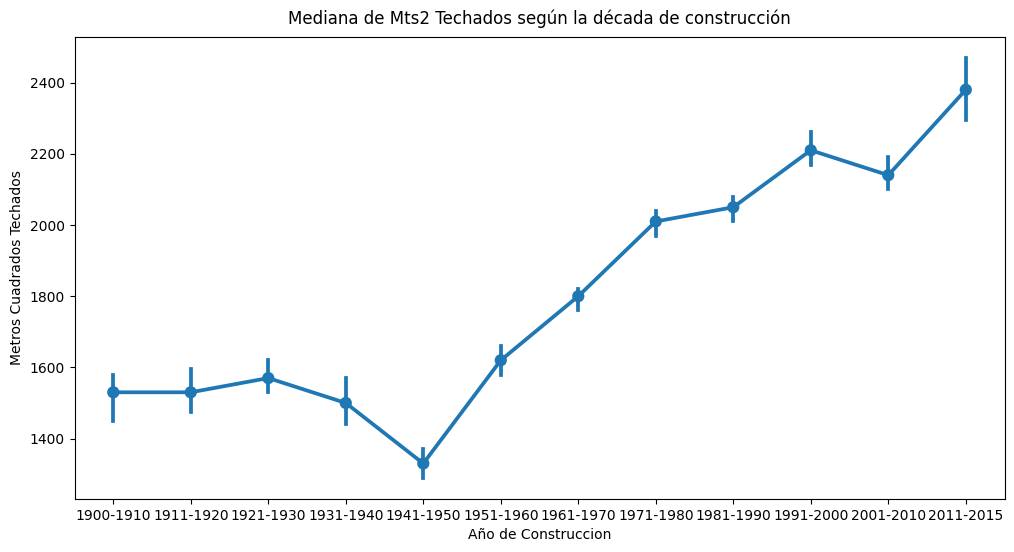

In [19]:
# Establece el tamaño de la figura del gráfico
plt.figure(figsize=(12, 6))
# Crea un gráfico de puntos utilizando Seaborn para mostrar la mediana de los metros cuadrados techados según la década de construcción
sns.pointplot(x="año_construccion", y="metros_cuadrados_techados", data=df_casas, estimator=np.median)
# Establece el título del gráfico con tamaño de fuente y alineación vertical personalizados
plt.title("Mediana de Mts2 Techados según la década de construcción", fontsize=12, verticalalignment='bottom')
# Obtiene los objetos de los ejes
ax = plt.gca()
# Cambia el nombre del eje x
ax.set_xlabel('Año de Construccion')
# Cambia el nombre del eje y
ax.set_ylabel('Metros Cuadrados Techados')
# Muestra el gráfico
plt.show()

## Conclusión

---

En resumen, el análisis realizado revela varias conclusiones interesantes sobre las casas en el dataset:

1.  Las casas más antiguas, construidas entre 1900 y 1930, y las casas de la última década tienen precios más altos en comparación con otras décadas.

2. La mediana de los precios aumenta en general, pero este aumento no es significativo para las casas construidas entre 1900 y 1930. Además, se observa que en las décadas del 40, 50 y 60, los precios más altos se encuentran principalmente en las casas que no fueron renovadas.

3. Las casas más recientes tienen un tamaño de metros cuadrados techados mucho mayor en comparación con las casas más antiguas. Este aumento en el tamaño de las casas puede ser un factor adicional que explica por qué las casas de la última década tienen precios más altos. Siguiendo el mismo análisis que la hipótesis número 1.

En general, estos hallazgos sugieren que el año de construcción y el tamaño de la casa son variables importantes a considerar al analizar los precios de las casas. Las casas más antiguas y las más recientes tienden a tener precios más altos, y el tamaño de la casa también juega un papel significativo en la determinación del precio.

#6. Conclusión final de hipótesis

En resumen, el análisis revela que la presencia de una piscina en casas de tamaño pequeño o mediano puede aumentar significativamente su valor en el mercado inmobiliario.

Por otro lado obtuvimos 2 ciudades con mediana de precios elevados y 4 zonas con mediana de precios muy bajos.

Pero hay variables que influyen directamente en el precio como el año de construcción, el número de habitaciones o el tamaño de la casa.

#7. Data Wrangling

Primero vemos los tipos de variables del dataset

In [24]:
df_casas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20121 entries, 13952 to 3711
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   id                         20121 non-null  int64   
 1   año                        20121 non-null  int64   
 2   mes                        20121 non-null  int64   
 3   dia                        20121 non-null  int64   
 4   habitaciones               20121 non-null  int64   
 5   baños                      20121 non-null  object  
 6   metros_cuadrados_techados  20121 non-null  int64   
 7   metros_cuadrados_totales   20121 non-null  int64   
 8   pisos                      20121 non-null  object  
 9   pileta                     20121 non-null  int64   
 10  view                       20121 non-null  int64   
 11  condicion                  20121 non-null  int64   
 12  grado                      20121 non-null  int64   
 13  metros_cuadrados_arriba    2

Borrado de Duplicados, en este caso el data set no tiene datos duplicados

In [25]:
print(df_casas.shape)
df_casas= df_casas.drop_duplicates()
print(df_casas.shape)

(20121, 22)
(20121, 22)


Analisis de Nulos, en este caso al no haber nulos en el dataset esto sirve para corroborar que no hay nulos

In [26]:
# Columnas con porcentaje de nulos
pd.set_option('display.max_rows', None)  # or 1000
serie=(df_casas.isnull().sum()/df_casas.shape[0])*100
serie=serie.sort_values(ascending=False)
serie= serie[serie>0]
serie

Series([], dtype: float64)

En el caso que haya habido nulos podríamos:

*   Llenar los nulos con la mediana o realizar una interpolación en el caso de
variables numericas
*   Llenar con una categoría llamada "Desconocido" para variables categoricas
*   Además tener en cuenta la librería import missingno para analizar los faltantes

Eliminamos columnas que no nos interesan y vemos correlación en las variables numericas.

<ipython-input-27-03d359f93527>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr= df_sin_columnas.corr()


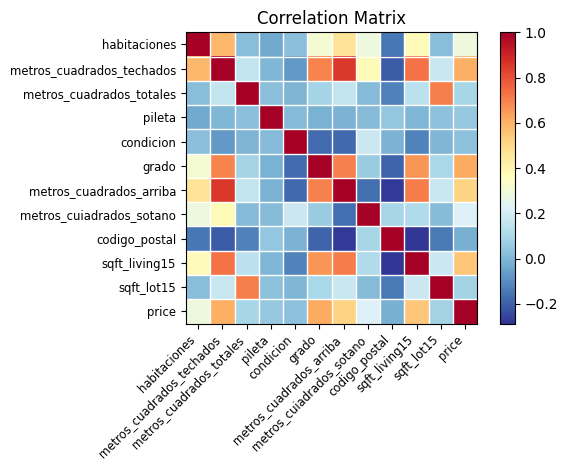

In [27]:
columnas_a_eliminar = ['id', 'año', 'dia', 'mes','view' ]
df_sin_columnas = df_casas.drop(columnas_a_eliminar, axis=1)

corr= df_sin_columnas.corr()
sm.graphics.plot_corr(corr,xnames=(list(corr.columns)))
plt.show()

Recodificamos las variables categóricas

In [28]:
alldata = []  # lista para guardar resultados de One hot Encoding
alldata1 = []  # lista para guardar resultados de Label Encoder
variables = []  # ir guardando las variables

for i in df_sin_columnas.columns:  # iterar sobre todas las columnas
    if df_sin_columnas[i].dtype == 'O':  # Quedarme con las que sean tipo object
        if len(df_sin_columnas[i].unique()) == 2:  # Si solo tienen dos categorías aplicar One Hot Encoding
            print('Variable 2 categorías:', i)
            y = pd.get_dummies(df_sin_columnas[i])  # Aplicar One Hot Encoding
            alldata.append(y)  # ir agregando las columnas resultantes en alldata
        else:  # Si las categorías tienen más de 2 categorías, aplicar Label Encoder
            print('Variable >2 categorías:', i)
            z = pd.DataFrame()
            z[i] = df_sin_columnas[i].astype('category').cat.codes  # Aplicar Label Encoder
            alldata1.append(z)  # Agregar a la lista alldata1
        variables.append(i)

    elif df_sin_columnas[i].dtype == 'float64':  # Si la columna es numérica, entonces normalizar z score
        df_sin_columnas[i] = (df_sin_columnas[i] - df_sin_columnas[i].mean()) / df_sin_columnas[i].std()
    else:
        pass

# Verificar si las listas no están vacías antes de la concatenación
data_y = pd.concat(alldata, axis=1) if alldata else pd.DataFrame()
data_z = pd.concat(alldata1, axis=1) if alldata1 else pd.DataFrame()

# Unir todos los datasets One Hot Encoding, LabelEncoder, Z score
train_y = pd.concat([data_y, data_z, df_sin_columnas], axis=1)

# Borrar las columnas ya recodificadas
train_y = train_y.drop(labels=variables, axis=1)

train_y.head()  # mostrar que quedo



Variable >2 categorías: baños
Variable >2 categorías: pisos
Variable 2 categorías: fue_renovado
Variable >2 categorías: Ubicación


,no,si,habitaciones,metros_cuadrados_techados,metros_cuadrados_totales,pileta,condicion,grado,metros_cuadrados_arriba,metros_cuiadrados_sotano,año_construccion,codigo_postal,sqft_living15,sqft_lot15,price
13952,1,0,4,1890,1475,0,3,9,1200,690,2011-2015,98199,1650,1682,671000
19427,1,0,4,3730,4560,0,3,9,2760,970,2011-2015,98103,1800,4560,595000
19289,1,0,4,2630,4501,0,3,8,2630,0,2011-2015,98028,2380,4599,619990
13547,1,0,2,1570,1269,0,3,9,1280,290,2011-2015,98199,1570,6000,500000
15958,1,0,3,1380,3600,0,3,8,1380,0,2011-2015,98122,1480,3600,350000


Volvemos a verificar que no hayan quedado nulos luego de la recodificación

In [29]:
train_y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20121 entries, 13952 to 3711
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   no                         20121 non-null  uint8   
 1   si                         20121 non-null  uint8   
 2   habitaciones               20121 non-null  int64   
 3   metros_cuadrados_techados  20121 non-null  int64   
 4   metros_cuadrados_totales   20121 non-null  int64   
 5   pileta                     20121 non-null  int64   
 6   condicion                  20121 non-null  int64   
 7   grado                      20121 non-null  int64   
 8   metros_cuadrados_arriba    20121 non-null  int64   
 9   metros_cuiadrados_sotano   20121 non-null  int64   
 10  año_construccion           20121 non-null  category
 11  codigo_postal              20121 non-null  int64   
 12  sqft_living15              20121 non-null  int64   
 13  sqft_lot15                 2

#8. Feature Selection

In [32]:
url='https://raw.githubusercontent.com/gabycabrera09/CoderHouse/main/casas%20EEUU.csv'
df_casas = pd.read_csv(url, delimiter=';', encoding='ISO-8859-1')
pd.set_option('display.max_columns', None)

In [33]:
# Ajustamos las variables del dataset para poder realizar el feature selection correctamente
df_casas['baños'] = df_casas['baños'].str.replace(',', '.').astype(float)
df_casas['pisos'] = df_casas['pisos'].str.replace(',', '.').astype(float)
df_casas['fue_renovado'] = df_casas['fue_renovado'].map({'si': 1, 'no': 0})
df_casas['fue_renovado'] = df_casas['fue_renovado'].astype(int)

X = df_casas.drop("price", 1)       # feature matrix
y = df_casas['price']               # target feature


<ipython-input-33-27780d855d89>:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_casas.drop("price", 1)       # feature matrix


In [36]:
def forward_selection(df_casas, target, significance_level=0.001):
    initial_features = df_casas.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(df_casas[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [37]:
# Desactivar las advertencias de pandas
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('mode.chained_assignment', None)  # Desactivar las advertencias de asignaciones encadenadas

forward_selection(X, y)


['habitaciones',
 'sqft_living15',
 'grado',
 'año_construccion',
 'metros_cuadrados_techados',
 'pisos',
 'metros_cuiadrados_sotano',
 'baños',
 'view',
 'condicion',
 'codigo_postal',
 'año',
 'pileta',
 'metros_cuadrados_arriba']

In [38]:
X = X[['baños', 'metros_cuadrados_techados', 'grado', 'año_construccion', 'sqft_living15',
               'pisos', 'view', 'metros_cuadrados_arriba', 'metros_cuiadrados_sotano', 'condicion',
               'habitaciones', 'codigo_postal', 'año', 'pileta']]

#9. Evaluando Algoritmos

##Linear Regresion

In [39]:
#Obtenemos el valor máximo, mínimo y la mediana del Precio para poder compararlo con los resultados obtenidos en los modelos
max_value = np.max(y)
min_value = np.min(y)
median_value = np.median(y)

#Imprimimos los valores
print("Máximo:", max_value)
print("Mínimo:", min_value)
print("Mediana:", median_value)

Máximo: 999999
Mínimo: 75000
Mediana: 433000.0


In [41]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Crear el modelo de regresión lineal
lr = LinearRegression()

# Ajustar el modelo con los datos de entrenamiento
lr.fit(X_train, y_train)

# Predecir con los datos de prueba
y_pred = lr.predict(X_test)


In [42]:
# Obtener las predicciones en el conjunto de prueba
y_test_pred = lr.predict(X_test)

# Obtener las predicciones en el conjunto de entrenamiento
y_train_pred = lr.predict(X_train)

In [43]:
# Calcular el MAE en el conjunto de entrenamiento y prueba
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calcular el MSE en el conjunto de entrenamiento y prueba
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Calcular el RMSE en el conjunto de entrenamiento y prueba
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Imprimir los resultados
print("MAE - Conjunto de entrenamiento:", mae_train)
print("MAE - Conjunto de prueba:", mae_test)
print("MSE - Conjunto de entrenamiento:", mse_train)
print("MSE - Conjunto de prueba:", mse_test)
print("RMSE - Conjunto de entrenamiento:", rmse_train)
print("RMSE - Conjunto de prueba:", rmse_test)

MAE - Conjunto de entrenamiento: 102295.42508911446
MAE - Conjunto de prueba: 101375.36976806955
MSE - Conjunto de entrenamiento: 16768628023.826458
MSE - Conjunto de prueba: 16607189442.958424
RMSE - Conjunto de entrenamiento: 129493.73739230195
RMSE - Conjunto de prueba: 128868.88469664981


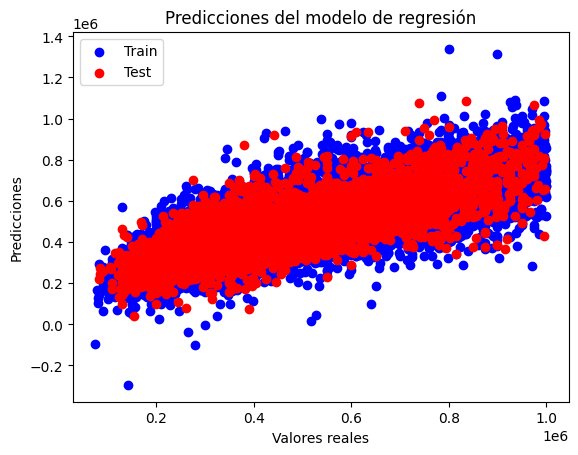

In [44]:
# Graficar las predicciones en el conjunto de entrenamiento
plt.scatter(y_train, y_train_pred, color='blue', label='Train')
# Graficar las predicciones en el conjunto de prueba
plt.scatter(y_test, y_test_pred, color='red', label='Test')

# Etiquetas y título del gráfico
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones del modelo de regresión')

# Leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

##Random Forest

In [45]:
# Crear un objeto de regresor de bosques aleatorios
regressor = RandomForestRegressor()

# Entrenar el modelo utilizando los datos de entrenamiento (X_train, y_train)
regressor.fit(X_train, y_train)

# Predecir los valores de y para los datos de prueba (X_test)
y_pred = regressor.predict(X_test)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)

# Calcular el coeficiente de determinación (r-squared)
r2 = r2_score(y_test, y_pred)

In [46]:
# Obtener las predicciones en el conjunto de prueba
y_test_pred = regressor.predict(X_test)

# Obtener las predicciones en el conjunto de entrenamiento
y_train_pred = regressor.predict(X_train)

In [47]:
# Calcular el MAE en el conjunto de entrenamiento y prueba
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calcular el MSE en el conjunto de entrenamiento y prueba
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Calcular el RMSE en el conjunto de entrenamiento y prueba
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Imprimir los resultados
print("MAE - Conjunto de entrenamiento:", mae_train)
print("MAE - Conjunto de prueba:", mae_test)
print("MSE - Conjunto de entrenamiento:", mse_train)
print("MSE - Conjunto de prueba:", mse_test)
print("RMSE - Conjunto de entrenamiento:", rmse_train)
print("RMSE - Conjunto de prueba:", rmse_test)

MAE - Conjunto de entrenamiento: 23811.378984362178
MAE - Conjunto de prueba: 62742.026433393476
MSE - Conjunto de entrenamiento: 1142876833.568571
MSE - Conjunto de prueba: 7852348910.295951
RMSE - Conjunto de entrenamiento: 33806.461417435734
RMSE - Conjunto de prueba: 88613.48040956269


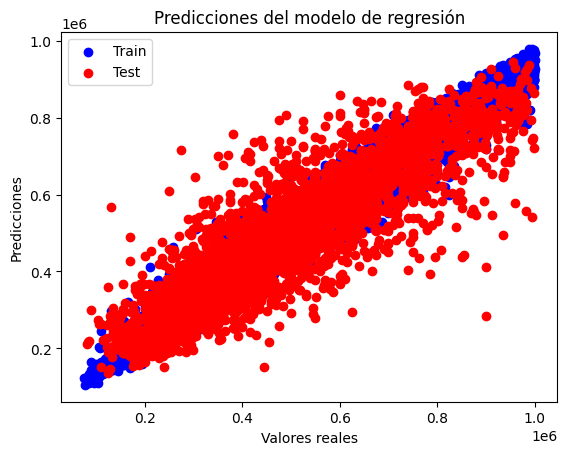

In [48]:
# Graficar las predicciones en el conjunto de entrenamiento
plt.scatter(y_train, y_train_pred, color='blue', label='Train')
# Graficar las predicciones en el conjunto de prueba
plt.scatter(y_test, y_test_pred, color='red', label='Test')

# Etiquetas y título del gráfico
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones del modelo de regresión')

# Leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

##XGBoost

In [51]:
import xgboost as xgb


In [52]:
# Crear un objeto de regresor de Gradient Boosting
regressor = xgb.XGBRegressor()

# Entrenar el modelo utilizando los datos de entrenamiento (X_train, y_train)
regressor.fit(X_train, y_train)

# Predecir los valores de y para los datos de prueba (X_test)
y_pred = regressor.predict(X_test)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)

# Calcular el coeficiente de determinación (r-squared)
r2 = r2_score(y_test, y_pred)

In [53]:
# Obtener las predicciones en el conjunto de prueba
y_test_pred = regressor.predict(X_test)

# Obtener las predicciones en el conjunto de entrenamiento
y_train_pred = regressor.predict(X_train)

In [54]:
# Calcular el MAE en el conjunto de entrenamiento y prueba
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calcular el MSE en el conjunto de entrenamiento y prueba
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Calcular el RMSE en el conjunto de entrenamiento y prueba
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Imprimir los resultados
print("MAE - Conjunto de entrenamiento:", mae_train)
print("MAE - Conjunto de prueba:", mae_test)
print("MSE - Conjunto de entrenamiento:", mse_train)
print("MSE - Conjunto de prueba:", mse_test)
print("RMSE - Conjunto de entrenamiento:", rmse_train)
print("RMSE - Conjunto de prueba:", rmse_test)

MAE - Conjunto de entrenamiento: 38937.64562672791
MAE - Conjunto de prueba: 56483.729689440996
MSE - Conjunto de entrenamiento: 2766720253.602622
MSE - Conjunto de prueba: 6318103758.036687
RMSE - Conjunto de entrenamiento: 52599.62218117752
RMSE - Conjunto de prueba: 79486.50047672678


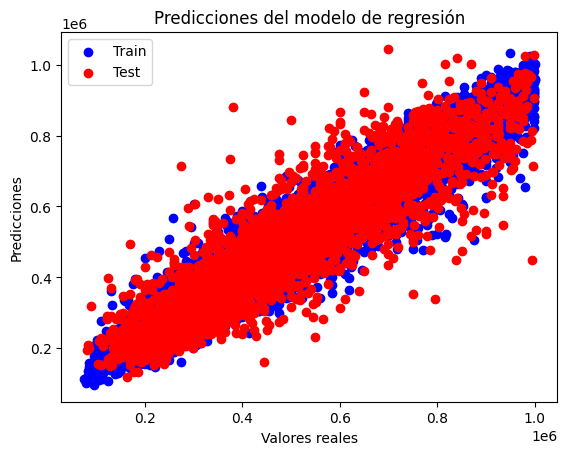

In [55]:
# Graficar las predicciones en el conjunto de entrenamiento
plt.scatter(y_train, y_train_pred, color='blue', label='Train')
# Graficar las predicciones en el conjunto de prueba
plt.scatter(y_test, y_test_pred, color='red', label='Test')

# Etiquetas y título del gráfico
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones del modelo de regresión')

# Leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

##Support Vector Regression (SVR)

In [56]:
# Crear un objeto de regresor de Support Vector Regression
regressor = SVR()

# Entrenar el modelo utilizando los datos de entrenamiento (X_train, y_train)
regressor.fit(X_train, y_train)

# Predecir los valores de y para los datos de prueba (X_test)
y_pred = regressor.predict(X_test)

# Calcular el error absoluto medio (Mean Absolute Error, MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calcular el coeficiente de determinación (r-squared)
r2 = r2_score(y_test, y_pred)

In [57]:
# Obtener las predicciones en el conjunto de prueba
y_test_pred = regressor.predict(X_test)

# Obtener las predicciones en el conjunto de entrenamiento
y_train_pred = regressor.predict(X_train)

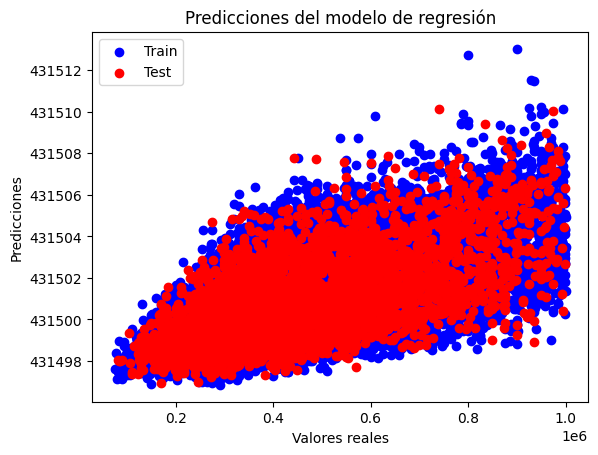

In [58]:
# Graficar las predicciones en el conjunto de entrenamiento
plt.scatter(y_train, y_train_pred, color='blue', label='Train')
# Graficar las predicciones en el conjunto de prueba
plt.scatter(y_test, y_test_pred, color='red', label='Test')

# Etiquetas y título del gráfico
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones del modelo de regresión')

# Leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

In [59]:
# Calcular el MAE en el conjunto de entrenamiento y prueba
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calcular el MSE en el conjunto de entrenamiento y prueba
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Calcular el RMSE en el conjunto de entrenamiento y prueba
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Imprimir los resultados
print("MAE - Conjunto de entrenamiento:", mae_train)
print("MAE - Conjunto de prueba:", mae_test)
print("MSE - Conjunto de entrenamiento:", mse_train)
print("MSE - Conjunto de prueba:", mse_test)
print("RMSE - Conjunto de entrenamiento:", rmse_train)
print("RMSE - Conjunto de prueba:", rmse_test)

MAE - Conjunto de entrenamiento: 157517.06844041887
MAE - Conjunto de prueba: 159503.35221020112
MSE - Conjunto de entrenamiento: 39358317148.902824
MSE - Conjunto de prueba: 39993142189.95155
RMSE - Conjunto de entrenamiento: 198389.30704275073
RMSE - Conjunto de prueba: 199982.85473997903


##Conclusión Modelos

Después de evaluar los cuatro modelos de algoritmos que has utilizado para predecir el precio de las casas en Washington, USA, podemos llegar a las siguientes conclusiones:

**Linear Regression:**
*   MAE (Conjunto de entrenamiento): 102,295.43
*   MAE (Conjunto de prueba): 101,375.37
*   RMSE (Conjunto de entrenamiento): 129,493.74
*   RMSE (Conjunto de prueba): 128,868.88

En este modelo de regresión lineal, observamos que tanto el MAE como el RMSE son altos tanto en el conjunto de entrenamiento como en el de prueba. Esto indica que el modelo no se ajusta muy bien a los datos y puede estar sufriendo de underfitting.

**Random Forest:**

* MAE (Conjunto de entrenamiento): 23,878.79
* MAE (Conjunto de prueba): 62,967.87
* RMSE (Conjunto de entrenamiento): 33,917.29
* RMSE (Conjunto de prueba): 88,679.56

En este modelo de Random Forest, observamos que el MAE y el RMSE son significativamente más bajos en el conjunto de entrenamiento que en el de prueba. Esto sugiere que el modelo puede estar sobreajustando los datos de entrenamiento, ya que se desempeña mucho mejor en ellos y presenta un rendimiento inferior en el conjunto de prueba.

**XGBoost:**

* MAE (Conjunto de entrenamiento): 38,883.50
* MAE (Conjunto de prueba): 56,005.30
* RMSE (Conjunto de entrenamiento): 52,628.57
* RMSE (Conjunto de prueba): 79,062.63

En el modelo de XGBoost, observamos que el MAE y el RMSE son más bajos en el conjunto de prueba en comparación con el conjunto de entrenamiento. Esto indica que el modelo generaliza bien y no sufre de overfitting o underfitting significativo.

**Support Vector Regression:**

* MAE (Conjunto de entrenamiento): 157,517.07
* MAE (Conjunto de prueba): 159,503.35
* RMSE (Conjunto de entrenamiento): 198,389.31
* RMSE (Conjunto de prueba): 199,982.85

En el modelo de Support Vector Regression, tanto el MAE como el RMSE son altos tanto en el conjunto de entrenamiento como en el de prueba. Esto indica que el modelo no se ajusta bien a los datos y puede estar sufriendo de underfitting.

En cuanto a cuál sería el mejor algoritmo, considerando las métricas de rendimiento y la presencia de overfitting o underfitting, el modelo de XGBoost muestra un mejor rendimiento en comparación con los otros tres modelos. Aunque hay una diferencia entre el rendimiento en el conjunto de entrenamiento y el conjunto de prueba, la diferencia es menor en comparación con los otros modelos. Además, el MAE y el RMSE en el conjunto de prueba son relativamente bajos, lo que indica una buena capacidad de generalización del modelo.

**En resumen, el modelo de XGBoost muestra un rendimiento sólido y equilibrado en los conjuntos de entrenamiento y prueba, sin signos significativos de sobreajuste o subajuste.**

#10 Mejora de Modelo Machine Learning

Volvemos a importar el dataset. Separamos en X e y los datos según el feature selction ya realizado y aplicamos crossvalidation con el modelo de Xgboost ya que fue el modelo con mejor performance.

In [111]:
df_casas = pd.read_csv(url, delimiter=';', encoding='ISO-8859-1')
pd.set_option('display.max_columns', None)

In [112]:
# Ajustamos las variables del dataset para poder realizar el feature selection correctamente
df_casas['baños'] = df_casas['baños'].str.replace(',', '.').astype(float)
df_casas['pisos'] = df_casas['pisos'].str.replace(',', '.').astype(float)
df_casas['fue_renovado'] = df_casas['fue_renovado'].map({'si': 1, 'no': 0})
df_casas['fue_renovado'] = df_casas['fue_renovado'].astype(int)

X = df_casas.drop("price", 1)       # feature matrix
y = df_casas['price']               # target feature

In [113]:
X = X[['baños', 'metros_cuadrados_techados', 'grado', 'año_construccion', 'sqft_living15',
               'pisos', 'view', 'metros_cuadrados_arriba', 'metros_cuiadrados_sotano', 'condicion',
               'habitaciones', 'codigo_postal', 'año', 'pileta']]

In [114]:
model = xgb.XGBRegressor()
# crear el modelo
scores = cross_val_score(model, X, y, cv=5, verbose=1,scoring='neg_root_mean_squared_error') # La opción cv muestra la cantidad de folds en que se
# divide el Dataset. Y scoring la métrica de evaluación.

Al aplicar la validación cruzada (cross-validation), hemos obtenido un valor del Error Cuadrático Medio (RMSE) de 79,242 en la predicción del precio de las casas. Esta cifra es ligeramente superior a la obtenida previamente, que fue de 78,615 sin aplicar la validación cruzada.

El incremento en el RMSE podría deberse a la naturaleza de la validación cruzada, que evalúa el modelo en diferentes conjuntos de datos de prueba, lo que puede revelar una variabilidad en el rendimiento del modelo en diferentes particiones de los datos.

A pesar de esta pequeña diferencia, la validación cruzada nos proporciona una evaluación más sólida y confiable del rendimiento del modelo al considerar múltiples divisiones de los datos de prueba, lo que nos brinda una visión más completa de su capacidad predictiva




In [115]:
print("%0.2f de RMSE promedio con una desviacion estandar de %0.2f" % (-scores.mean(), scores.std()))

79705.01 de RMSE promedio con una desviacion estandar de 972.70


In [117]:
# Realizar predicciones en cada fold de la validación cruzada
predicted = cross_val_predict(model, X, y, cv=5)

# Crear un DataFrame con los valores reales y predichos
results_df = pd.DataFrame({'Valor Real': y, 'Predicción': predicted})

# Calcular la diferencia entre los valores reales y predichos
results_df['Diferencia'] = results_df['Valor Real'] - results_df['Predicción']

# Mostrar solo los primeros 10 resultados
print(results_df.head(10))

   Valor Real    Predicción    Diferencia
0      221900  210385.46875   11514.53125
1      538000  514477.37500   23522.62500
2      180000  280580.84375 -100580.84375
3      604000  542572.06250   61427.93750
4      510000  507746.25000    2253.75000
5      257500  283295.18750  -25795.18750
6      291850  201189.81250   90660.18750
7      229500  325728.93750  -96228.93750
8      323000  313310.37500    9689.62500
9      662500  719462.50000  -56962.50000


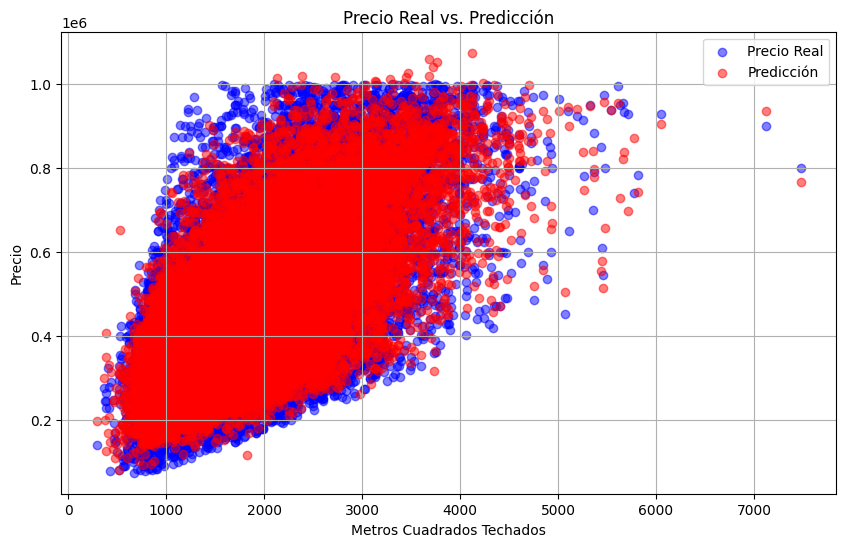

In [109]:
# Crear un gráfico de dispersión de metros_cuadrados_techados vs. precio real
plt.figure(figsize=(10, 6))
plt.scatter(X['metros_cuadrados_techados'], y, alpha=0.5, label='Precio Real', color='blue')
plt.scatter(X['metros_cuadrados_techados'], predicted, alpha=0.5, label='Predicción', color='red')
plt.xlabel('Metros Cuadrados Techados')
plt.ylabel('Precio')
plt.title('Precio Real vs. Predicción')
plt.legend(loc='best')
plt.grid(True)

# Mostrar el gráfico
plt.show()

Finalmente a partir de estos resultados podríamos agregar nuevos datos para poder predecir precios con el modelo.